In [1]:
#Author: Trevor Donovan
#Purpose: Fit a general Gaussian cylinder to Timepix data. Data is time-integrated for an initial set of hits
#Potential concerns: gaussian cylinders are constant in 'amplitude' and width, but data is not.
#the code is not 

In [2]:
#prepping block
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import pandas as pd
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D #is there an interactive version of this...?

cent_csv = "D:\Trevor\MZ_GaAs-BB_ZoomInSlight-10s_W0028_H07-240731-154119-1_cent.csv" #I should try with and without centroiding in case of weirdness

def gaussian_cylinder(xy, a, b, c, d):
    x, y = xy
    return a*np.exp(-(b*x+c*y+d)**2)

In [3]:
num_counts = 1000000 #above ten million, I need to divide into chunks
sp_counts_df = pd.read_csv(cent_csv, nrows=num_counts) 
sp_counts_df

,#Col,#Row,#ToA,#ToT[arb],#ToTtotal[arb],#Centroid,#cent_X,#cent_Y,#centStdev_X,#centStdev_Y,#centStdev_ToA,Unnamed: 11
0,133,169,157272451328,275.0,275.0,1.0,133.500000,169.500000,0.500000,0.500000,0.0,NaN
1,108,106,157272500736,325.0,325.0,1.0,108.500000,106.500000,0.500000,0.500000,0.0,NaN
2,174,143,157272558592,225.0,225.0,1.0,174.500000,143.500000,0.500000,0.500000,0.0,NaN
3,108,73,157272763904,375.0,500.0,2.0,108.500000,73.750000,0.500000,0.661438,2560.0,NaN
4,164,219,157273011456,650.0,1750.0,4.0,164.428571,219.942857,0.738172,0.704794,2898.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,156,239,229648100864,175.0,175.0,1.0,156.500000,239.500000,0.500000,0.500000,0.0,NaN
999996,219,55,229648196608,375.0,525.0,2.0,219.214286,55.500000,0.673856,0.500000,3072.0,NaN
999997,44,251,229648197120,100.0,100.0,1.0,44.500000,251.500000,0.500000,0.500000,0.0,NaN
999998,131,103,229648379392,325.0,325.0,1.0,131.500000,103.500000,0.500000,0.500000,0.0,NaN


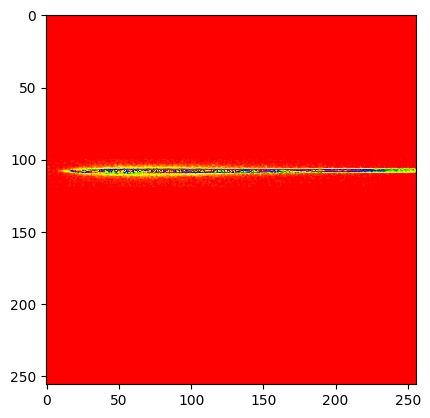

In [4]:
high = 255
low = 0
subbox = sp_counts_df[(sp_counts_df['#Row'] <= high) & (sp_counts_df['#Col'] <= high) 
& (sp_counts_df['#Row'] >= low) & (sp_counts_df['#Col'] >= low)]

hist, xedges, yedges = np.histogram2d(subbox['#Col'], subbox['#Row'], bins=[256,256])

hist[120:,:] = 0.0 #determines which BB line we're considering
hist[:100,:] = 0.0
hist += 1.0 #to avoid zeroes?

fig, ax = plt.subplots()
ax.imshow(hist,cmap='prism')

In [5]:
xy = np.ones((256,256))
for i in range(256):
    xy[i,:] = i
xy_size = np.size(xy)

In [6]:
#fitting nonsense
x = np.transpose(xy).reshape(1,xy_size)[0]
y = xy.reshape(1,xy_size)[0]
z = hist.reshape(1,xy_size)[0]

popt, pcov = curve_fit(gaussian_cylinder,(x,y),z)

print(f'popt is: {popt}')

print(f'pcov is: {pcov}')

print(f'If the graph makes sense, the angle is {np.arctan(popt[2]/popt[1])*180./np.pi:.3f} degrees')

popt is: [1. 1. 1. 1.]
pcov is: [[ 6.19384520e+10 -1.54814235e+10 -1.54814235e+10  3.09691950e+10]
 [-1.54814235e+10  3.87009056e+09  3.86956382e+09 -7.74070920e+09]
 [-1.54814235e+10  3.86956382e+09  3.87009056e+09 -7.74070920e+09]
 [ 3.09691950e+10 -7.74070920e+09 -7.74070920e+09  1.54845872e+10]]
If the graph makes sense, the angle is 45.000 degrees


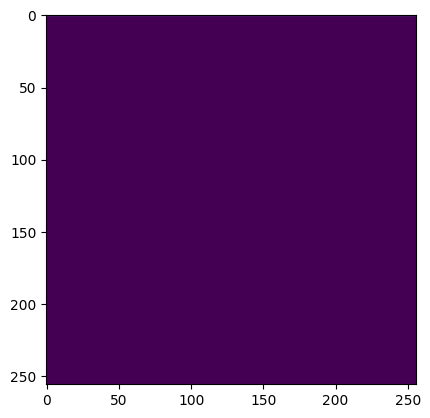

In [8]:
fig, ax = plt.subplots() 
X, Y = np.meshgrid(xy[0,:],xy[:,0])
ax.imshow(gaussian_cylinder((X,Y),*popt))